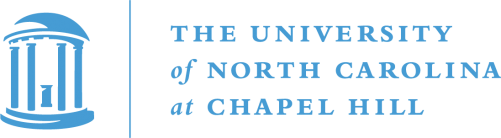


# Notebook 09
**Course:** *Econ 590, Computational Methods for Economists*, [University of North Carolina at Chapel Hill](https://econ.unc.edu/), Spring 2025  
**Instructor:** [Marlon Azinovic-Yang](https://sites.google.com/view/marlonazinovic/home)  
**Contact:** marlonay@unc.edu  
**References:** This notebook has benefited greatly from the teaching material and notebooks generously made available by [Simon Scheidegger](https://sites.google.com/site/simonscheidegger/home), [Felix Kubler](https://sites.google.com/site/fkubler/), [Harold Linh Cole](https://economics.sas.upenn.edu/people/harold-l-cole), [Jeremy Greenwood](https://www.jeremygreenwood.net/), [Jeppe Druedahl](https://sites.google.com/view/jeppe-druedahl/), [Rick Evans](https://sites.google.com/site/rickecon/), and by [Tom Sargent](http://www.tomsargent.com/) and [John Stachurski](https://johnstachurski.net/) on [QuantEcon](https://quantecon.org/).

# Content
The goal of this notebook is to introduce numpy module to work with vectors in Python. 

The standard library to work with vectors and matrices, as well as to do numerical computing is `numpy`. We can import the numpy module using the standard abbreviation `np` by executing `import numpy as np`

#### 1D Arrays (Vectors)
A **vector** in NumPy is represented as a **1D array**:


In [3]:
# import the numpy library as np
import numpy as np

# we create a one dimensional array with the numbers [1, 2, 3, 4, 5]
v = np.array([1, 2, 3, 4, 5])


In [4]:
print("Vector:", v)

Vector: [1 2 3 4 5]


A numpy array, like a list, is a mutable object. We can read out and modify values in specific positions.

In [5]:
print("v[0] = ", v[0])
print("v[1] = ", v[1])
print("v[2] = ", v[2])


# modify the element in position 0
v[0] = 5
print("v = ", v)

# we can get the shape of the array 
print("v.shape = ", v.shape)

# we can also get a range elements
# the first 3 elements
print("v[0 : 3] = ", v[0 : 3])

#the last 2 elements
print("v[-2 : ] = ", v[-2 : ])


v[0] =  1
v[1] =  2
v[2] =  3
v =  [5 2 3 4 5]
v.shape =  (5,)
v[0 : 3] =  [5 2 3]
v[-2 : ] =  [4 5]


##### Basic vector operations
Vectors in Python can be added, subtracted, and scaled just like mathematical vectors.

**Exercise**: 
1. Create two vectors $\mathbf{x} = \begin{bmatrix}1 \\ 2 \\ 3\end{bmatrix}$ and $\mathbf{y} = \begin{bmatrix}2 \\ 1 \\ 0\end{bmatrix}$
2. Compute $\mathbf{a} = \mathbf{x} +  \mathbf{y}$
3. Compute $\mathbf{b} = \mathbf{x} - \mathbf{y}$
4. Compute $\mathbf{c} = 0.76 \mathbf{x}$
5. Compute $\mathbf{d} = 4.5 \mathbf{x} - 1.9 \mathbf{y}$

In [6]:
x = np.array([1,2,3])
y = np.array([2,1,0])

a = x + y
print(a)

b = x - y
print(b)

c = .76*x
print(c)

d = 4.5*x - 1.9*y
print(d)

[3 3 3]
[-1  1  3]
[0.76 1.52 2.28]
[ 0.7  7.1 13.5]


##### Vectors as function inputs
We can write functions that take multiple numbers (of the same type) as functions taking a single vector as input instead. For example, let's code the function $f(a, b) = a + b ^ 2$ first as a function of two inputs $a$ and $b$, and then as a function of a single vector $\mathbf{x}\in\mathbb{R}^2 = \begin{bmatrix} x_0 \\ x_1\end{bmatrix}$, where $x_0 = a$ and $x_1 = b$.

In [9]:
def f(a, b):
    return a + b ** 2


def fvec(x):
    # read out the inputs
    a = x[0]
    b = x[1]

    # perform the computation
    res = a + b ** 2 # alternatively we could use the function we coded above: res = f(a, b)

    return res

def fvec2(x):
    return x[0] + x[1] ** 2

In [12]:
print("f(1, 1) = ", f(1, 1))
print("fvec(np.array([1, 1])) = ", fvec(np.array([1, 1])))
print("fvec2(np.array([1, 1])) = ", fvec2(np.array([1, 1])))
print("\n")
print("f(1, 3) = ", f(1, 3))
print("fvec(np.array([1, 3])) = ", fvec(np.array([1, 3])))
print("fvec2(np.array([1, 3])) = ", fvec2(np.array([1, 3])))

f(1, 1) =  2
fvec(np.array([1, 1])) =  2
fvec2(np.array([1, 1])) =  2


f(1, 3) =  10
fvec(np.array([1, 3])) =  10
fvec2(np.array([1, 3])) =  10


**Exercise**: Write a version of the function `fvec(x)` of the function `f(a, b, c)` below, that instead of three arguments $a, b, c$ takes a single vector $\mathbf{x} = \begin{bmatrix}a \\ b \\ c \end{bmatrix}$ as input.  
$f(a, b, c) = 0.1 + 0.2  a^2 + 3 (b - c)$

In [26]:
def f(a, b, c):
    return 0.1 + 0.2 * a ** 2 + 3 * (b - c)

def fvec(x):
   return f(x[0], x[1], x[2])

In [27]:
a = 2.0
b = 1.0
c = 0.5

x = np.array([a, b, c])
print("f(a, b, c) = " , f(a, b, c))
print("fvec(x) = " , fvec(x))


f(a, b, c) =  2.4
fvec(x) =  2.4


##### Vectors as function outputs
Similarly, if a function outputs two numbers $a$ and $b$ of the same type, we could instead output a single vector $\mathbf{x} = \begin{bmatrix}a \\ b \end{bmatrix}$.  
**Exercise**: Rewrite the following function `f(y)` to return a single vector $\mathbf{x} = \begin{bmatrix}a \\ b \\ c \\ d \end{bmatrix}$, instead of the tuple `(a, b, c, d)`.

In [36]:
def f(y):
    a = y
    b = y ** 2
    c = y ** 3
    d = y ** 4
    return (a, b, c, d)

In [37]:
def fvec(y):
    return np.array([y, y**2, y**3, y**4])

In [38]:
ytest = 2

print("f(ytest) = ", f(ytest))

print("fvec(ytest) = ", fvec(ytest))


f(ytest) =  (2, 4, 8, 16)
fvec(ytest) =  [ 2  4  8 16]


##### Vectors as function inputs and outputs
We can have vectors as both function inputs and outputs. For example we can define a function taking a vector $\mathbf{x} = \begin{bmatrix}x_0 \\ x_1 \end{bmatrix}$ as input and returning a vector $\mathbf{f}(\mathbf{x}) = \begin{bmatrix}x_0 - 1 \\ x_1 - 2 x_0 ^ 2 \end{bmatrix}$.  
**Exercise**: Implement the function.

In [ ]:
def f(x):
    return np.array([x[0] - 1, x[1] - 2 * x[0] ** 2])

In [47]:
x = np.array([1, 1])

print("x = ", x)

print("f(x) = ", f(x))


x =  [1 1]
f(x) =  [ 0 -1]


**Exercise**: Guess the vector $\mathbf{x}\in \mathbb{R}^2$, such that $\mathbf{f}(\mathbf{x}) = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$, and verify your guess.

In [48]:
x = np.array([1, 2])

print("x = ", x)
print("f(x) = ", f(x))

x =  [1 2]
f(x) =  [0 0]


As we saw in class, many times we can characterize the solution to an economic model by a system of equations, for example the system of first order conditions if we have a concave maximization problem. That's why it is often of interest to us, to find $\mathbf{x}$. such that $\mathbf{f}(\mathbf{x}) = \mathbf{0}$. In one dimension, we have implemented the bisection and the Newton-Raphson method. It turns out, that similar ideas extend to systems of equations with vectors as inputs and vectores as outputs. Luckily for us, there are Python libraries, which already implemented the solution methods for us. The most popular model for that purpose is the root function, part of the [scipy.optimize](https://docs.scipy.org/doc/scipy/tutorial/optimize.html) module. The [root](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html) function requires us to pass a function $\mathbf{f} : \mathbf{x}\in \mathbb{R}^N \rightarrow \mathbf{f}(\mathbf{x})\in \mathbb{R}^N$, as well as a starting point $\mathbf{x}_0 \in \mathbb{R}^N$.

In [49]:
from scipy.optimize import root

? root

Signature:
 root(
    fun,
    x0,
    args=(),
    method='hybr',
    jac=None,
    tol=None,
    callback=None,
    options=None,
)
Docstring:
Find a root of a vector function.

Parameters
----------
fun : callable
    A vector function to find a root of.
x0 : ndarray
    Initial guess.
args : tuple, optional
    Extra arguments passed to the objective function and its Jacobian.
method : str, optional
    Type of solver. Should be one of

        - 'hybr'             :ref:`(see here) <optimize.root-hybr>`
        - 'lm'               :ref:`(see here) <optimize.root-lm>`
        - 'broyden1'         :ref:`(see here) <optimize.root-broyden1>`
        - 'broyden2'         :ref:`(see here) <optimize.root-broyden2>`
        - 'anderson'         :ref:`(see here) <optimize.root-anderson>`
        - 'linearmixing'     :ref:`(see here) <optimize.root-linearmixing>`
        - 'diagbroyden'      :ref:`(see here) <optimize.root-diagbroyden>`
        - 'excitingmixing'   :ref:`(see here) <optimiz

In [50]:
x0 = np.array([2, 2])
print("x0 = ", x0)
print("f(x0) = ", f(x0))


x0 =  [2 2]
f(x0) =  [ 1 -6]


In [51]:

solution = root(f, x0)

print(solution)

 message: The solution converged.
 success: True
  status: 1
     fun: [ 0.000e+00  0.000e+00]
       x: [ 1.000e+00  2.000e+00]
  method: hybr
    nfev: 6
    fjac: [[-1.614e-01  9.869e-01]
           [-9.869e-01 -1.614e-01]]
       r: [-6.197e+00  9.869e-01 -1.614e-01]
     qtf: [-1.082e-01  1.768e-02]


In [52]:

# root returns a dictionary, which includes keys like "success", "x" (the x that solves f(x) = 0), and "fun", the function value at the fouund solution.
success = solution["success"]
x = solution["x"]
fx = solution["fun"]
print("#=================================")
print("success = ", success)
print("x = ", x)
print("f(x) = ", fx)
print("#=================================")

#=================================
success =  True
x =  [1. 2.]
f(x) =  [0. 0.]
#=================================


##### [Optional]: Plotting the function
The function we defined has two inputs and two outputs. We can graph each of the outputs against different combinations of the two input values.

In [53]:
from matplotlib import pyplot as plt

# we create a grid of combinations
# Convert the function to accept scalar inputs using lambda
f_scalar = lambda x0, x1: f(np.array([x0, x1]))

# Create a grid of x1 and x2 values
x0_vals = np.linspace(-3, 3, 100)
x1_vals = np.linspace(-3, 3, 100)
X0, X1 = np.meshgrid(x0_vals, x1_vals)

print("X0.shape = ", X0.shape)
print("X1.shape = ", X1.shape)

fvals = f_scalar(X0, X1)  # Apply function to grid
print("fvals.shape = ", fvals.shape)

f0 = fvals[0, :, :] # read out first output dimension
f1 = fvals[1, :, :] # read out second output dimension

X0.shape =  (100, 100)
X1.shape =  (100, 100)
fvals.shape =  (2, 100, 100)


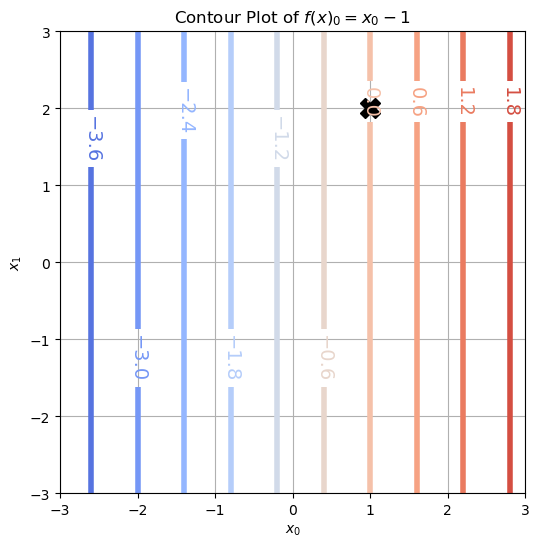

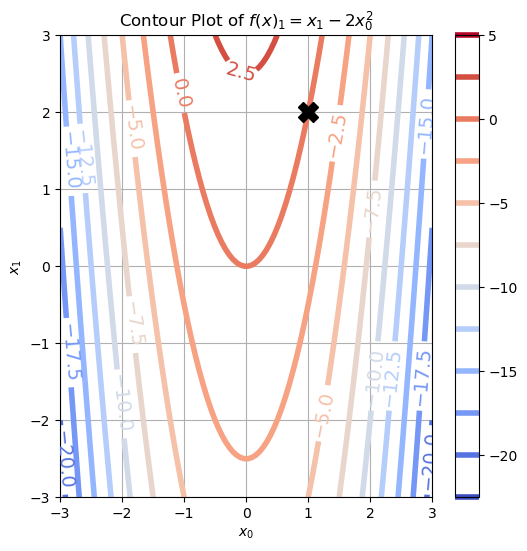

In [54]:

# Create the contour plot
plt.figure(figsize=(6, 6))
contour = plt.contour(X0, X1, f0, levels=10, cmap="coolwarm", linewidths = 4)  # Contour lines
plt.clabel(contour, inline=True, fontsize=14)  # Label contour lines

# plot point [1, 2]
plt.plot(1, 2, marker = "X", markersize = 15, color = "k")


# Labels and title
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.title("Contour Plot of $f(x)_0 = x_0 - 1$")

# Show plot
plt.grid(True)
plt.show()

# Create the contour plot
plt.figure(figsize=(6, 6))
contour = plt.contour(X0, X1, f1, levels=10, cmap="coolwarm", linewidths = 4)  # Contour lines
plt.clabel(contour, inline=True, fontsize=14)  # Label contour lines

# plot point [1, 2]
plt.plot(1, 2, marker = "X", markersize = 15, color = "k")

# Labels and title
plt.xlabel("$x_0$")
plt.ylabel("$x_1$")
plt.title("Contour Plot of $f(x)_1 = x_1 - 2x_0^2$")

# Show plot
plt.colorbar()
plt.grid(True)
plt.show()